In [1]:
!python --version

Python 3.8.8


In [2]:
!pip list | grep tensor

tensorboard            2.2.2
tensorboard-plugin-wit 1.8.0
tensorflow             2.2.0
tensorflow-estimator   2.2.0


In [3]:
!pip list | grep torch

torch                  1.7.1
torchvision            0.8.2


In [4]:
!nvidia-smi

Thu Mar  4 13:40:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.39       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8     1W /  N/A |    490MiB /  3911MiB |     21%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Numerical Computing

In [5]:
import numpy as np

x = np.zeros((3, 2))
x

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
x.shape, x.dtype

((3, 2), dtype('float64'))

In [7]:
x[0, :] = 1
x

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [8]:
x[:, 0] = 2
x

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [9]:
X = np.array([[1, 2], [3, 4], [5, 6]])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [10]:
x = np.array([0, 10])
print(x)
print(x.shape, X.shape)

[ 0 10]
(2,) (3, 2)


In [11]:
x + X

array([[ 1, 12],
       [ 3, 14],
       [ 5, 16]])

In [12]:
x * X

array([[ 0, 20],
       [ 0, 40],
       [ 0, 60]])

In [13]:
X = np.array([[1, 2], [3, 4], [5, 6]])
x = np.array(
    [
        [0, 10],
    ]
).T
print(X.shape, x.shape)

(3, 2) (2, 1)


In [14]:
X @ x

array([[20],
       [40],
       [60]])

### Indexing

In [15]:
X = np.random.rand(4, 3)
X

array([[0.36876455, 0.78725644, 0.69641619],
       [0.34014793, 0.31642386, 0.32080831],
       [0.88537694, 0.56602177, 0.01634511],
       [0.32105114, 0.08300521, 0.22468306]])

In [16]:
X > 0.5

array([[False,  True,  True],
       [False, False, False],
       [ True,  True, False],
       [False, False, False]])

In [17]:
X[X > 0.5]

array([0.78725644, 0.69641619, 0.88537694, 0.56602177])

In [18]:
X[X > 0.5] = 1
X

array([[0.36876455, 1.        , 1.        ],
       [0.34014793, 0.31642386, 0.32080831],
       [1.        , 1.        , 0.01634511],
       [0.32105114, 0.08300521, 0.22468306]])

## Basic Plotting

In [19]:
import matplotlib.pyplot as plt

plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

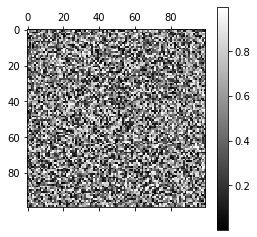

In [20]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

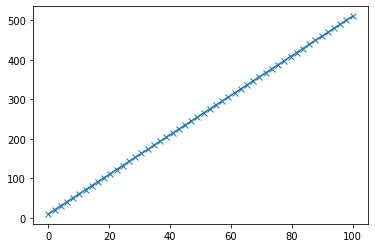

In [21]:
x = np.linspace(0, 100)
w, b = 5, 10
y = x * w + b
plt.plot(x, y, "x-")

## Basic regression with linear model

In [22]:
n = 50
d = 1
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array(
    [
        [5],
    ]
)
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(
    f"x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}"
)

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


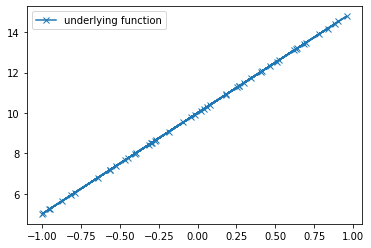

In [23]:
plt.plot(x, y_true, marker="x", label="underlying function")
plt.legend()

## Basic prediction function: linear

In [24]:
class Linear:
    def __init__(self, input_dim, num_hidden=1):
        # the initialization is important to properly deal with different
        # input sizes (otherwise gradients quickly go to 0)
        self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2.0 / input_dim)
        self.bias = np.zeros(num_hidden)

    def __call__(self, x):
        return x @ self.weights + self.bias

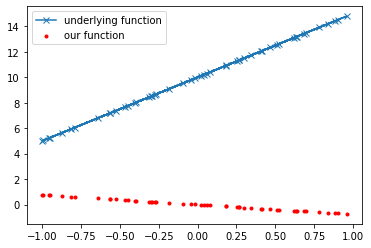

In [25]:
linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker="x", label="underlying function")
plt.scatter(x, y_pred, color="r", marker=".", label="our function")
plt.legend()

## Basic loss function: MSE

In [26]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()


loss = MSE()
print(f"Initial loss: {loss(y_pred, y_true)}")

Initial loss: 110.11178133200548


### Adding back propagation

In [27]:
class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()

    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2 * (self.y_pred - self.y_true) / n
        # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
        return self.gradient

In [28]:
class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2.0 / input_dim)
        self.bias = np.zeros(num_hidden)

    def __call__(self, x):
        self.x = x
        output = x @ self.weights + self.bias
        return output

    def backward(self, gradient):
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum(axis=0)
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient

    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient

In [29]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))

loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

113.75534254938307
76.2493337695403


## Training with gradient descent

Epoch: 0, Loss: 105.18621526724662
Epoch: 5, Loss: 13.62867654323979
Epoch: 10, Loss: 2.6714854687117016
Epoch: 15, Loss: 0.9119714176454389
Epoch: 20, Loss: 0.4213707175027548
Epoch: 25, Loss: 0.21260045404051392
Epoch: 30, Loss: 0.10941970507012506
Epoch: 35, Loss: 0.05655244508569472


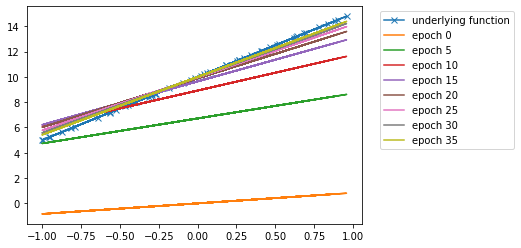

In [30]:
plt.plot(x, y_true, marker="x", label="underlying function")

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
    y_pred = linear(x)
    loss_value = loss(y_pred, y_true)

    if epoch % 5 == 0:
        print(f"Epoch: {epoch}, Loss: {loss_value}")
        plt.plot(x, y_pred.squeeze(), label=f"epoch {epoch}")

    gradient_from_loss = loss.backward()
    linear.backward(gradient_from_loss)
    linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

## 2D data

In [31]:
n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array(
    [
        [2, -1],
    ]
).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

(100, 2) (2, 1) (1,)


In [32]:
y_true = x @ weights_true + bias_true
print(
    f"x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}"
)

x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


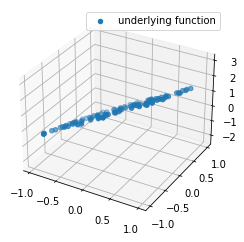

In [33]:
def plot_3d(x, y, y_pred=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(x[:, 0], x[:, 1], y, label="underlying function")

    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], y_pred, label="our function")
    plt.legend()


plot_3d(x, y_true)

1.2417334012489059


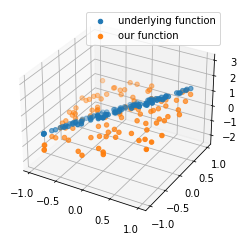

In [34]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

In [35]:
from typing import Callable


def fit(
    x: np.ndarray,
    y: np.ndarray,
    model: Callable,
    loss: Callable,
    lr: float,
    num_epochs: int,
):
    for epoch in range(num_epochs):
        y_pred = model(x)
        loss_value = loss(y_pred, y)
        if epoch % 5 == 0:
            print(f"Epoch: {epoch} | Loss: {loss_value}")
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)

In [36]:
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)

Epoch: 0 | Loss: 1.2417334012489059
Epoch: 5 | Loss: 0.6881094427346066
Epoch: 10 | Loss: 0.39435160337293107
Epoch: 15 | Loss: 0.22799564267086134


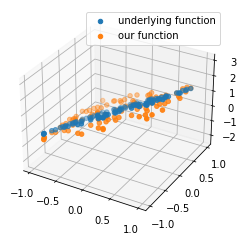

In [37]:
plot_3d(x, y_true, linear(x))

## Basic regression with MLP

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


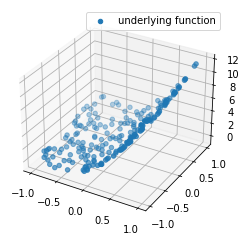

In [38]:
n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array(
    [
        [5, 1],
    ]
).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(
    f"x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}"
)

plot_3d(x, y_true)

Epoch: 0 | Loss: 15.281525832867269
Epoch: 5 | Loss: 5.771450760595808
Epoch: 10 | Loss: 3.7905781428377274
Epoch: 15 | Loss: 3.1055705433532053
Epoch: 20 | Loss: 2.8015332083685287
Epoch: 25 | Loss: 2.656445972990462
Epoch: 30 | Loss: 2.585934218554088
Epoch: 35 | Loss: 2.5514772190300175


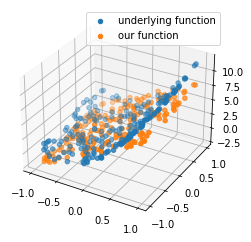

In [39]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

## Add non-linearity: ReLU

In order to learn non-linear functions, we need non-linearities in our model.

In [45]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
        self.input_gradient = (self.input_ > 0) * output_gradient
        return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


## New non-linear model

In [46]:
class Model:
    def __init__(self, input_dim, num_hidden):
        self.linear1 = Linear(input_dim, num_hidden)
        self.relu = Relu()
        self.linear2 = Linear(num_hidden, 1)

    def __call__(self, x):
        l1 = self.linear1(x)
        r = self.relu(l1)
        output = self.linear2(r)
        return output

    def backward(self, output_gradient):
        linear2_gradient = self.linear2.backward(output_gradient)
        relu_gradient = self.relu.backward(linear2_gradient)
        linear1_gradient = self.linear1.backward(relu_gradient)
        return linear1_gradient

    def update(self, lr):
        self.linear2.update(lr)
        self.linear1.update(lr)

27.20285216624031


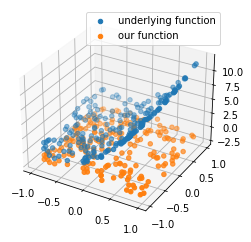

In [47]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [48]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

18.418517427775445
8.108151833648614


Epoch: 0 | Loss: 8.108151833648614
Epoch: 5 | Loss: 5.697853884218289
Epoch: 10 | Loss: 4.030248343816112
Epoch: 15 | Loss: 3.0005377716223585
Epoch: 20 | Loss: 2.3858037490536974
Epoch: 25 | Loss: 2.000970437738009
Epoch: 30 | Loss: 1.7317610514638841
Epoch: 35 | Loss: 1.5283225248418184
Epoch: 40 | Loss: 1.365849761367557
Epoch: 45 | Loss: 1.234249141982054


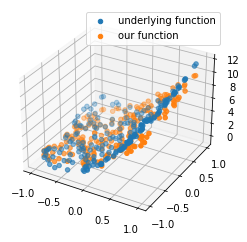

In [49]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=50)
plot_3d(x, y_true, model(x))

---
# PyTorch

---

In [50]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
    def __init__(self, input_dim, num_hidden):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, num_hidden)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden, 1)

    def forward(self, x):
        l1 = self.linear1(x)
        r = self.relu(l1)
        l2 = self.linear2(r)
        return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(20.8500, grad_fn=<MseLossBackward>)


In [52]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(14.0531, grad_fn=<MseLossBackward>)
tensor(10.3140, grad_fn=<MseLossBackward>)


tensor(10.3140, grad_fn=<MseLossBackward>)
tensor(2.2238, grad_fn=<MseLossBackward>)
tensor(0.7271, grad_fn=<MseLossBackward>)
tensor(0.4062, grad_fn=<MseLossBackward>)
tensor(0.3036, grad_fn=<MseLossBackward>)
tensor(0.2527, grad_fn=<MseLossBackward>)
tensor(0.2200, grad_fn=<MseLossBackward>)
tensor(0.1965, grad_fn=<MseLossBackward>)


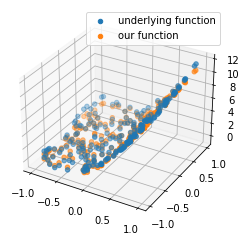

In [54]:
def torch_fit(
    x: np.ndarray,
    y: np.ndarray,
    model: Callable,
    loss: Callable,
    lr: float,
    num_epochs: int,
):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y_pred_tensor = model(x)
        loss_value = loss(y_pred_tensor, y)
        if epoch % 5 == 0:
            print(loss_value)
        loss_value.backward()
        optimizer.step()


torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

---
# TensorFlow / Keras

---

In [55]:
from tensorflow import keras
from tensorflow.keras import layers, optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation="relu", name="dense_1")(inputs)
outputs = layers.Dense(1, name="regression")(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
7/7 [==============================] - 0s 3ms/step - loss: 8.7268
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.0373
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.6658
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.3015
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2380
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2703
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.1774
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 0.2289
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.1717
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.1678


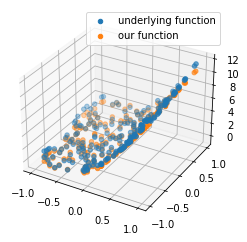

In [56]:
model.compile(loss="mse", optimizer=optimizers.SGD(0.1))
model.fit(x, y_true, epochs=10)
y_pred = model.predict(x)
plot_3d(x, y_true, y_pred)